In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
import warnings 
warnings.filterwarnings('ignore')

In [15]:
from sklearn.datasets import load_iris

In [79]:
data = load_iris()

In [81]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### EDA

In [89]:
x = df.drop('target', axis=1)
y = df.target

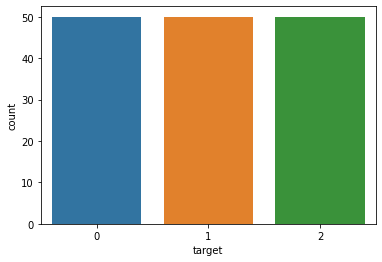

In [83]:
sns.countplot(y)
plt.show()

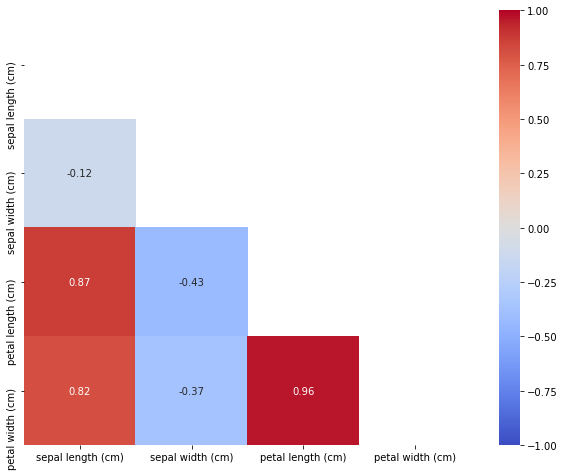

In [85]:
def plot_heatmap(x):
    fig = plt.figure(figsize=(10,8))
    sns.heatmap(x.corr(method='pearson'), annot=True, cmap='coolwarm', vmax=1, vmin=-1, mask=np.triu(x.corr()))
    plt.show()
plot_heatmap(x)

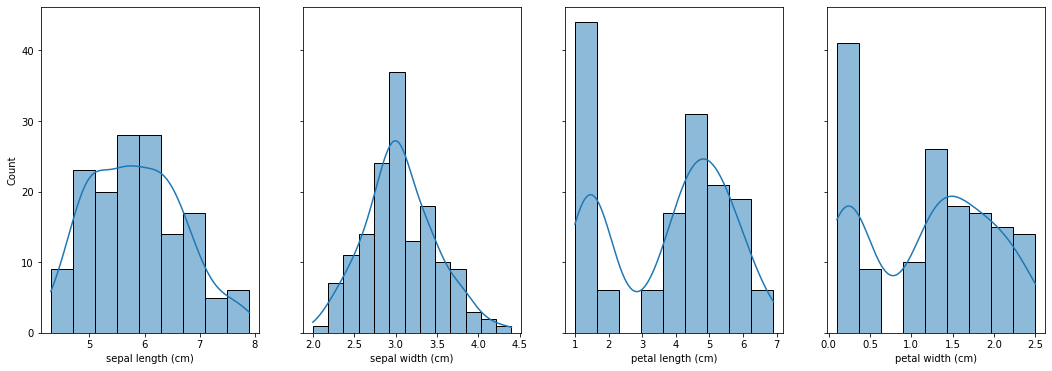

In [90]:
def plot_histplot_features(x):
    fig, ax = plt.subplots(1, len(x.columns), figsize=(18,6), sharey=True)
    for i in range(len(x.columns)):
        sns.histplot(x[x.columns[i]], ax=ax[i], kde=True)
    plt.show()
plot_histplot_features(x)

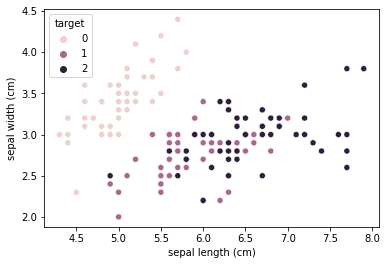

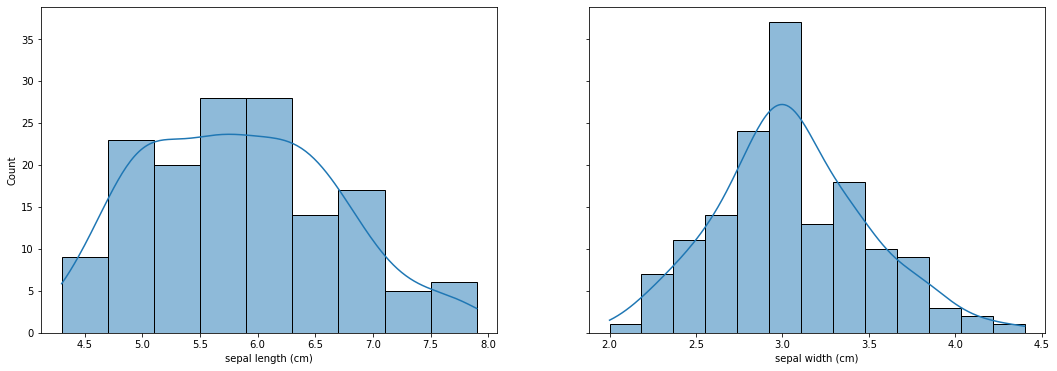

In [93]:
x = x[['sepal length (cm)', 'sepal width (cm)']]
sns.scatterplot(data=pd.concat([x,y], axis=1), x='sepal length (cm)', y='sepal width (cm)', hue='target')
plt.show()
plot_histplot_features(x)

In [94]:
new_df = pd.concat([x,y], axis=1)

P(Y=y|x0,x1) ~ P(Y) * P(x0|y) * P(x1)*(y)

Posterior probability ~class prior probability * likelihoods

P(xi|y) = 1/sqrt(2 * pi * std_y^^2) * e(-((x_i-mu_y)^^2/(2 * std_y^^2)))

In [95]:
def calculate_prior(df, target, label):
    total = len(df)
    df = df[df[target]==label]
    return len(df)/total

In [106]:
def calculate_likelihood_gaussian(df, target, label, feature_name, feature_val):
    df = df[df[target]==label]

    mean = df[feature_name].mean()
    std = df[feature_name].std()

    p_x_given_y = (1/np.sqrt(2*np.pi*(std**2)))*np.exp(-1*(feature_val-mean)**2/(2*std**2))
    return p_x_given_y

In [137]:
def predict(df, target, test_data):
    x = df.drop(target, axis=1)

    probabilities = [calculate_prior(df, target, i) for i in df[target].unique()]

    for j in new_df[target].unique():
        for i in range(len(x.columns)):
            probabilities[j] = probabilities[j]*calculate_likelihood_gaussian(df, target, df[target].unique()[j], x.columns[i], test_data[i])

    prediction = df[target].unique()[np.argmax(probabilities)]
    return prediction

In [230]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(new_df.drop('target', axis=1), new_df.target, shuffle=True, random_state=123, test_size=0.25)

train_df = pd.concat([x_train, y_train], axis=1)
test_df = pd.concat([x_test, y_test], axis=1)

In [231]:
def make_predictions_iris(train_df, test_df):
    test_data = []
    for idx in test_df.index:
        test_data.append([test_df.loc[idx, 'sepal length (cm)'], test_df.loc[idx, 'sepal width (cm)']])

    predictions = []
    for i in range(len(test_data)):
        predictions.append(predict(train_df, 'target', test_data[i]))
    test_df['predictions'] = predictions

    return test_df

In [232]:
test_df = make_predictions_iris(train_df, test_df)

In [233]:
from sklearn.metrics import accuracy_score

In [234]:
accuracy_score(test_df.target, test_df.predictions)

0.8421052631578947

In [235]:
from sklearn.naive_bayes import GaussianNB
gaussnb = GaussianNB()

In [236]:
gaussnb.fit(x_train, y_train)
accuracy_score(y_test, gaussnb.predict(x_test))

0.8421052631578947